IMPORT YANG DIPERLUKAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UAS_ML/cyberbullying_tweets.csv")

In [ ]:
df.head

<bound method NDFrame.head of                                               tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]>

In [ ]:
df.isnull().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df.duplicated().sum()

36

In [ ]:
df.drop_duplicates()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



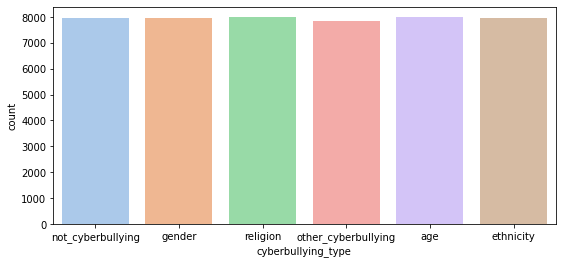

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,4))
sns.countplot(df.cyberbullying_type,palette="pastel")

In [ ]:
df["cyberbullying_type"].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
df = df[df["cyberbullying_type"]!="other_cyberbullying"]

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import emoji

def remove_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text)

In [ ]:
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
def text_cleaning (text):
    text = text.replace('\r', '').replace('\n', ' ').lower() 
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) 
    text = re.sub(r'[^\x00-\x7f]',r'', text) 
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14)
    return text

In [ ]:
def decontract(text):
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    return text

In [ ]:
def remove_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

In [ ]:
def filter_chars(text):
    sent = []
    for word in text.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [ ]:
from nltk.stem import WordNetLemmatizer,PorterStemmer

def stemming(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

In [ ]:
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

In [ ]:
def deep_clean(text):
    text = remove_emoji(text)
    text = text_cleaning(text)
    text = decontract(text)
    text = remove_hashtags(text)
    text = filter_chars(text)
    text = stemming(text)
    text = remove_mult_spaces(text)
    
    return text

In [ ]:
clean_tweet_text = []
for t in df.tweet_text:
    clean_tweet_text.append(deep_clean(t))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'



In [ ]:
df['new_tweet_text'] = clean_tweet_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head(10)

,tweet_text,cyberbullying_type,new_tweet_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,ye test god good bad indiffer weird whatev pro...
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,itu sekolah ya bukan tempat bulli ga jauh kaya...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,karma hope bite kat butt nasti mkr
8,@stockputout everything but mostly my priest,not_cyberbullying,everyth mostli priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,rebecca black drop school due bulli


In [ ]:
df["new_tweet_text"].duplicated().sum()

1030

In [ ]:
df.drop_duplicates("new_tweet_text", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.shape

(38839, 3)

In [ ]:
from collections import Counter

df['tweet_list'] = df['new_tweet_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['tweet_list'] for item in sublist])
tweet_list01 = pd.DataFrame(top.most_common(50))
tweet_list01.columns = ['Words', 'Count']
tweet_list01.style.background_gradient(cmap = 'Accent_r')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Words,Count
0,bulli,10097
1,school,9020
2,fuck,7162
3,like,5789
4,nigger,5436
5,girl,5426
6,joke,5362
7,dumb,5139
8,high,5002
9,muslim,4741


In [ ]:
import plotly.express as px

figure = px.bar(tweet_list01, x ='Count', y = 'Words', title = 'Top 50 words in the tweets', orientation = 'h', width=600, height=1000, color='Words')
figure.show()

In [ ]:
df["cyberbullying_type"].value_counts()

religion             7947
age                  7886
ethnicity            7748
not_cyberbullying    7650
gender               7608
Name: cyberbullying_type, dtype: int64

In [ ]:
text_len = []
for text in df.new_tweet_text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
df['text_len'] = text_len

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = df[df['text_len'] > 5]

In [ ]:
df.sort_values(by=['text_len'], ascending=False)

,tweet_text,cyberbullying_type,new_tweet_text,tweet_list,text_len
44035,You so black and white trying to live like a n...,ethnicity,black white tri live like nigger pahahahaha co...,"[black, white, tri, live, like, nigger, pahaha...",190
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb ass nigger bitch ltthi whore s...,"[fuck, obama, dumb, ass, nigger, bitch, ltthi,...",164
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,research push import top antibulli program us ...,"[research, push, import, top, antibulli, progr...",146
33724,"... I don't feel guilty for killing him, I jus...",age,dont feel guilti kill feel guilti enjoy tormen...,"[dont, feel, guilti, kill, feel, guilti, enjoy...",138
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,ethnicity,sooo mad rt fuck obama dumb nigger im go switz...,"[sooo, mad, rt, fuck, obama, dumb, nigger, im,...",126
...,...,...,...,...,...
44358,"“@tayyoung_: FUCK OBAMA, dumb ass nigger” hater",ethnicity,fuck obama dumb ass nigger hater,"[fuck, obama, dumb, ass, nigger, hater]",6
14165,RT @Matt_Toppa I hate women sports analysts #n...,gender,rt hate women sport analyst notsexist,"[rt, hate, women, sport, analyst, notsexist]",6
3944,"@CherguiaMbark A single brotherhood, from the ...",not_cyberbullying,singl brotherhood idiot said muslim shia,"[singl, brotherhood, idiot, said, muslim, shia]",6
44367,RT @ChainReactionzz: Fuck Obama care dumb nigger,ethnicity,rt fuck obama care dumb nigger,"[rt, fuck, obama, care, dumb, nigger]",6


In [ ]:
df["cyberbullying_type"].value_counts()

religion             7673
age                  7582
ethnicity            7404
gender               6920
not_cyberbullying    5158
Name: cyberbullying_type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["cyberbullying_type"] = label_encoder.fit_transform(df["cyberbullying_type"])
df["cyberbullying_type"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        3
3        3
4        3
5        3
6        3
        ..
47687    1
47688    1
47689    1
47690    1
47691    1
Name: cyberbullying_type, Length: 34737, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



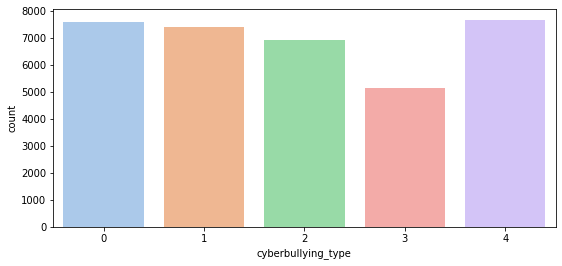

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(df.cyberbullying_type,palette="pastel")

In [ ]:
df["cyberbullying_type"].value_counts()

4    7673
0    7582
1    7404
2    6920
3    5158
Name: cyberbullying_type, dtype: int64

In [ ]:
X = df['new_tweet_text']
y = df['cyberbullying_type']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27789,) (27789,)
(6948,) (6948,)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features= 700)
train_vectors = vectorizer.fit_transform(x_train)
text_vectors = vectorizer.transform(x_test)

# **Model 1**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=350, n_estimators=100, class_weight="balanced")
rfc.fit(train_vectors, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=350)

In [ ]:
print('Training Score\t= ', rfc.score(train_vectors, y_train), '\nTesting Score\t= ', rfc.score(text_vectors, y_test))

Training Score	=  0.9993882471481521 
Testing Score	=  0.9330742659758203


In [ ]:
print('Training Predict\t= ', rfc.predict(train_vectors), '\nTesting Predict\t= ', rfc.predict(text_vectors))

Training Predict	=  [2 1 1 ... 2 1 0] 
Testing Predict	=  [3 3 1 ... 4 2 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test, rfc.predict(text_vectors)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1516
           1       0.99      0.98      0.99      1481
           2       0.93      0.88      0.91      1384
           3       0.76      0.84      0.80      1032
           4       0.96      0.95      0.96      1535

    accuracy                           0.93      6948
   macro avg       0.92      0.93      0.93      6948
weighted avg       0.94      0.93      0.93      6948



In [ ]:
print('Confusion Matrice:\n', confusion_matrix(y_test, rfc.predict(text_vectors)))

Confusion Matrice:
 [[1479    1    2   34    0]
 [   2 1453    5   16    5]
 [   3    3 1220  155    3]
 [  28    9   77  869   49]
 [   1    1    6   65 1462]]


# **Model 2**

In [ ]:
rfc1 = RandomForestClassifier(max_depth=200, n_estimators=250, class_weight="balanced", min_samples_leaf=3, max_features= "log2")
rfc1.fit(train_vectors, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=200,
                       max_features='log2', min_samples_leaf=3,
                       n_estimators=250)

In [ ]:
print('Training Score\t= ', rfc1.score(train_vectors, y_train), '\nTesting Score\t= ', rfc1.score(text_vectors, y_test))

Training Score	=  0.9467415164273634 
Testing Score	=  0.932930339666091


In [ ]:
print(classification_report(y_test, rfc1.predict(text_vectors)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1516
           1       0.99      0.98      0.98      1481
           2       0.96      0.86      0.91      1384
           3       0.76      0.87      0.81      1032
           4       0.96      0.95      0.95      1535

    accuracy                           0.93      6948
   macro avg       0.93      0.93      0.93      6948
weighted avg       0.94      0.93      0.93      6948



In [ ]:
print('Confusion Matrice:\n', confusion_matrix(y_test, rfc.predict(text_vectors)))

Confusion Matrice:
 [[1479    1    2   34    0]
 [   2 1453    5   16    5]
 [   3    3 1220  155    3]
 [  28    9   77  869   49]
 [   1    1    6   65 1462]]


# **Testing dengan data baru**

In [ ]:
new_added_tweets = ["🚨 Kylian Mbappé will STAY at Paris Saint-Germain. He’s definitely not joining Real Madrid this summer, the final decision has been made and communicated to Florentino Perez. 🤝 #Mbappé", "Ricky Gervais defends 'taboo' comedy after backlash I think this man is very funny and very courageous. He’s being bashed by the leftist liberal radicals because he dares to include humor about the LGBT whatever groups.", " love a nigga that’s obsessed wit me bc i b obsessed wit my nigga", "İ believe the suspect is moeslem, or maybe russian, or maybe black, or maybe al qaeda.Because white  was never doing this terrible terror..", "An Afghan-Muslim boy was found hung at his high school in Webb City, Missouri and zero news outlets are covering it. He was a refugee and his family does not speak English so the lack of coverage is a result of officials taking advantage. Please share #JusticeforRezwan !", "Did you know that the current President of Singapore (one of the most successful and advanced countries in the world) is a hijab wearing Muslim - Mrs Halimah Yacob? 🇸🇬 Alhamdulillah. 🇫🇷France please take note.."]

In [ ]:
df1 = pd.DataFrame({"tweet_text" : new_added_tweets})
df1

,tweet_text
0,🚨 Kylian Mbappé will STAY at Paris Saint-Germa...
1,Ricky Gervais defends 'taboo' comedy after bac...
2,love a nigga that’s obsessed wit me bc i b ob...
3,"İ believe the suspect is moeslem, or maybe rus..."
4,An Afghan-Muslim boy was found hung at his hig...
5,Did you know that the current President of Sin...


In [ ]:
clean_new_text = []
for o in df1.tweet_text:
    clean_new_text.append(deep_clean(o))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'



In [ ]:
clean_new_text

['kylian mbapp stay pari saintgermain he definit join real madrid summer final decis made commun florentino perez mbapp',
 'ricki gervai defend taboo comedi backlash think man funni courag he bash leftist liber radic dare includ humor lgbt whatev group',
 'love nigga that obsess wit bc b obsess wit nigga',
 'believ suspect moeslem mayb russian mayb black mayb al qaedabecaus white never terribl terror',
 'afghanmuslim boy found hung high school webb citi missouri zero news outlet cover refuge famili speak english lack coverag result offici take advantag pleas share',
 'know current presid singapor one success advanc countri world hijab wear muslim mr halimah yacob alhamdulillah franc pleas take note']

In [ ]:
new_test = vectorizer.transform(clean_new_text)
print(new_test)

  (0, 575)	0.3689510733757826
  (0, 495)	0.3196367657040723
  (0, 367)	0.28709803582069227
  (0, 323)	0.4047928996615001
  (0, 272)	0.3117884234331206
  (0, 215)	0.40027468910294334
  (0, 152)	0.3762395404082377
  (0, 116)	0.34122841351016236
  (1, 663)	0.3728547062084701
  (1, 607)	0.22764532438760415
  (1, 490)	0.26745437209814493
  (1, 371)	0.2656719026719691
  (1, 349)	0.36443098229578713
  (1, 303)	0.3847555569313232
  (1, 272)	0.29929103819839215
  (1, 256)	0.30912451449592276
  (1, 235)	0.287212924371269
  (1, 151)	0.34434348975723045
  (2, 603)	0.33004211235377284
  (2, 414)	0.7810311759295213
  (2, 365)	0.3387205784080889
  (2, 58)	0.4078368252893532
  (3, 664)	0.18562363799649154
  (3, 600)	0.21489513988050565
  (3, 409)	0.20420969572147538
  (3, 376)	0.829230388257903
  (3, 71)	0.17618387924059287
  (3, 63)	0.23578319363817216
  (3, 18)	0.32156621950882164
  (4, 591)	0.26054568469268796
  (4, 568)	0.31356420680976543
  (4, 539)	0.3694436959246007
  (4, 523)	0.141355917123655

In [ ]:
rfc.predict(new_test)

array([3, 4, 1, 4, 0, 4])

In [ ]:
rfc1.predict(new_test)

array([3, 4, 1, 4, 0, 4])